In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M=3 #dimension
N=10000 #number of data
mean = np.array([3,4, 5])
cov = np.array([ [4, -1.2,0.3], [-1.2, 1,0.3], [0.3,0.3,3] ])
data = np.random.multivariate_normal(mean, cov, size=N)

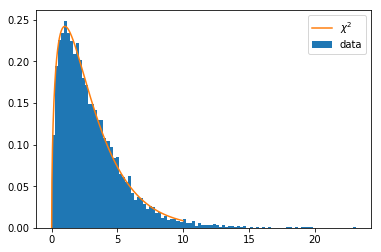

In [5]:
from scipy import stats
import math
from matplotlib import rc
hist=[]
mean_ob=np.mean(data,axis=0)
cov_ob=np.cov(data.T)
for i in range(N):
    hist.append((data[i]-mean_ob)@np.linalg.inv(cov_ob)@(data[i]-mean_ob).T) 
plt.hist(hist,bins=100,normed=True,label='data');
x1 = np.arange(0,10,0.01)
y1 = stats.chi2.pdf(x=x1, df=M)
plt.plot(x1,y1,label=r'$\chi ^2$')
plt.legend();

In [4]:
alpha=0.05 #false alarm rate
threshold=stats.chi2.ppf(1-alpha, df=M)
def judge(x):
    if (x-mean_ob)@np.linalg.inv(cov_ob)@(x-mean_ob).T>threshold:
        print('anomaly')
    else:
        print('not anomaly')
judge([0,0,0])
judge([3,4,5])

anomaly
not anomaly
